# preparing the data

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sbe
import os 
import math 
import shutil
from glob import glob
from numpy import array
from imutils import paths
#from tensorflow.keras import models,layers
import cv2

In [2]:

training_ds=tf.data.Dataset.list_files("Teeth DataSet\\Teeth_Dataset\\Training\\*\\*",shuffle=False)
testing_ds=tf.data.Dataset.list_files("Teeth DataSet\\Teeth_Dataset\\Testing\\*\\*",shuffle=False)
validation_ds=tf.data.Dataset.list_files("Teeth DataSet\\Teeth_Dataset\\Validation\\*\\*",shuffle=False)



b'Teeth DataSet\\Teeth_Dataset\\Training\\CaS\\a_100_0_1462.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Training\\CaS\\a_100_0_4424.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Training\\CaS\\a_100_0_5215.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Training\\CaS\\a_100_0_5539.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Testing\\CaS\\a_100.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Testing\\CaS\\a_101_0_1635.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Testing\\CaS\\a_101_0_1711.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Testing\\CaS\\a_101_0_4911.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Validation\\CaS\\a_100_0_982.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Validation\\CaS\\a_101_0_2726.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Validation\\CaS\\a_101_0_5413.jpg'
b'Teeth DataSet\\Teeth_Dataset\\Validation\\CaS\\a_102_0_5905.jpg'


In [11]:
class_name=["CaS","CoS","Gum","MC","OC","OLP","OT"]
training_ds = training_ds.shuffle(200)
testing_ds = testing_ds.shuffle(200)
validation_ds = validation_ds.shuffle(200)
image_train_count=len(training_ds)
print(image_train_count)
print(len(testing_ds))
print(len(validation_ds))


3087
1028
1028


In [12]:
#s="Teeth DataSet\\Teeth_Dataset\\Training\\MC"
#s.split("\\")[-1]
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2]


In [16]:
def process_image(file_path):
    label=get_label(file_path)
    img = tf.io.read_file(file_path)  # Read the image file
    img = tf.image.decode_jpeg(img, channels=3)  # Decode as JPEG
    img = tf.image.resize(img, [256, 256])  # Resize to 256x256
    return img, label  # Return image and label as a tuple


#training_ds = training_ds.map(process_image)

In [18]:
training_ds=training_ds.map(process_image)
testing_ds=testing_ds.map(process_image)
validation_ds=validation_ds.map(process_image)
for img,label in training_ds.take(2):
    print(img)

    

tf.Tensor(
[[[218. 175. 156.]
  [217. 174. 155.]
  [216. 173. 154.]
  ...
  [143. 139. 136.]
  [135. 130. 126.]
  [130. 125. 121.]]

 [[215. 172. 153.]
  [216. 173. 154.]
  [217. 174. 155.]
  ...
  [140. 136. 133.]
  [133. 128. 124.]
  [128. 123. 119.]]

 [[212. 169. 150.]
  [214. 171. 152.]
  [217. 174. 155.]
  ...
  [138. 133. 129.]
  [131. 126. 122.]
  [126. 121. 117.]]

 ...

 [[ 68.  35.  16.]
  [ 68.  35.  16.]
  [ 66.  33.  16.]
  ...
  [130. 152. 166.]
  [130. 152. 166.]
  [130. 152. 166.]]

 [[ 66.  33.  16.]
  [ 68.  35.  18.]
  [ 67.  34.  17.]
  ...
  [131. 153. 167.]
  [131. 153. 167.]
  [131. 153. 167.]]

 [[ 65.  32.  15.]
  [ 68.  35.  18.]
  [ 68.  35.  18.]
  ...
  [132. 154. 168.]
  [132. 154. 168.]
  [132. 154. 168.]]], shape=(256, 256, 3), dtype=float32)
tf.Tensor(
[[[244. 255. 255.]
  [244. 255. 255.]
  [244. 255. 255.]
  ...
  [245. 152. 121.]
  [241. 150. 121.]
  [240. 149. 120.]]

 [[244. 255. 255.]
  [244. 255. 255.]
  [244. 255. 255.]
  ...
  [245. 152. 121.]

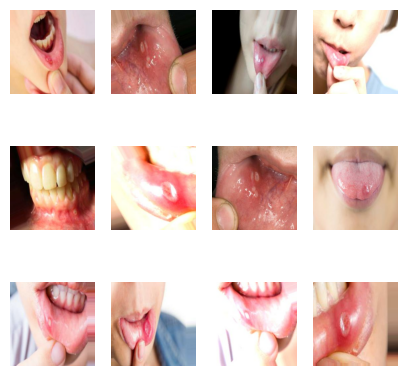

In [57]:
plt.figure(figsize=(5, 5))
for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        for image, label in training_ds.take(i+1):
            plt.imshow(image.numpy().astype("uint8"))
            #plt.title(label.numby()[0])
            plt.axis("off")

        
    
    

In [58]:
def scale(image, label):
    return image/255, label

In [59]:
training_ds=training_ds.map(scale)
testing_ds=testing_ds.map(scale)
validation_ds=validation_ds.map(scale)

In [60]:
# Extracting images (x_train) and labels (y_train) as numpy arrays
x_train = []
y_train = []

for img, label in training_ds.as_numpy_iterator():
    x_train.append(img)
    y_train.append(label)

# Convert lists to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape, y_train.shape)  # Check the shapes of the data
#print(type(y_train[0]))

(3087, 256, 256, 3) (3087,)


In [61]:
# Extracting images (x_train) and labels (y_train) as numpy arrays
x_test = []
y_test = []

for img, label in testing_ds.as_numpy_iterator():
    x_test.append(img)
    y_test.append(label)

# Convert lists to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_test.shape, y_test.shape)  # Check the shapes of the data
#print(type(y_train[0]))

(1028, 256, 256, 3) (1028,)


In [62]:
# Extracting images (x_train) and labels (y_train) as numpy arrays
x_val = []
y_val = []

for img, label in validation_ds.as_numpy_iterator():
    x_val.append(img)
    y_val.append(label)

# Convert lists to numpy arrays
x_val = np.array(x_val)
y_val = np.array(y_val)

print(x_val.shape, y_val.shape)  # Check the shapes of the data
#print(type(y_train[0]))

(1028, 256, 256, 3) (1028,)


In [64]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform string labels to integer labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)
y_val = label_encoder.fit_transform(y_val)
print(y_train)

[0 0 0 ... 6 6 6]


# Visualizing the data 

<BarContainer object of 7 artists>

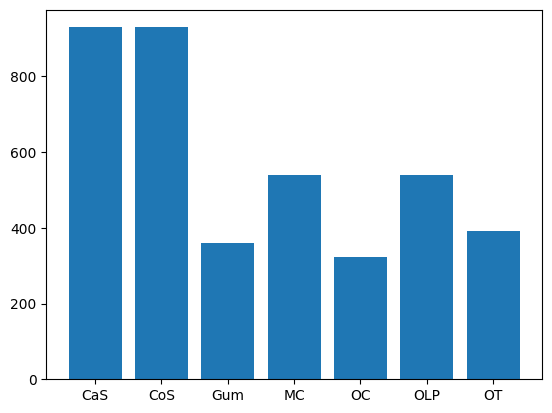

In [66]:
n_CaS=0
n_CaS=0
n_Gum=0
n_MC=0
n_OC=0
n_OLP=0
n_OT=0

for i in y_train:
    if i==0:
        n_CaS+=1
    elif i==1:
        n_CaS+=1
    elif i==2:
        n_Gum+=1
    elif i==3:
        n_MC+=1
    elif i==4:
        n_OC+=1
    elif i==5:
        n_OLP+=1
    else:
        n_OT+=1
y_list=[n_CaS,
n_CaS,
n_Gum,
n_MC,
n_OC,
n_OLP,
n_OT]
plt.bar(class_name,y_list)


here we prepare the data to be used in the modeling process

# Preparing the model

In [67]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')
])

c:\Users\shahd\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [70]:
history=cnn.fit(x_train, y_train, epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 54s 515ms/step - accuracy: 0.1779 - loss: 3.1355 - val_accuracy: 0.2850 - val_loss: 1.8135
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 42s 436ms/step - accuracy: 0.4277 - loss: 1.5426 - val_accuracy: 0.4903 - val_loss: 1.3977
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 58s 604ms/step - accuracy: 0.6704 - loss: 0.9656 - val_accuracy: 0.5292 - val_loss: 1.3099
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 67s 691ms/step - accuracy: 0.8645 - loss: 0.4244 - val_accuracy: 0.5136 - val_loss: 1.6753
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 66s 682ms/step - accuracy: 0.9415 - loss: 0.2010 - val_accuracy: 0.5311 - val_loss: 1.7383
Epoch 6/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 47s 479ms/step - accuracy: 0.9853 - loss: 0.0718 - val_accuracy: 0.5360 - val_loss: 2.3547
Epoch 7/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 57s 588ms/step - accuracy: 0.9965 - loss: 0.0162 - val_accuracy: 0.5428 - val_loss: 2.2390
Epoch 8/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 55s 561ms/step - accuracy: 0.9989 - loss: 0.0091 - val_accu

In [76]:
model_eval=cnn.evaluate(x_test,y_test)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.6040 - loss: 2.3255


In [77]:
predictions=cnn.predict(x_test)
predictions[:15]

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step


array([[5.27118829e-08, 9.99999881e-01, 7.62708368e-08, 5.73357551e-12,
        9.94878117e-13, 1.79495960e-10, 2.97540548e-10],
       [9.11478877e-01, 8.77173468e-02, 2.20593764e-04, 2.21388938e-04,
        1.97896297e-04, 6.43773601e-05, 9.96652088e-05],
       [2.00307462e-02, 6.91618043e-05, 8.46810192e-02, 4.83287960e-01,
        1.53692448e-10, 4.11926687e-01, 4.48161018e-06],
       [9.91781652e-01, 1.12836287e-05, 1.48135383e-04, 4.83369315e-03,
        8.41948029e-04, 1.33955281e-03, 1.04384369e-03],
       [8.03942502e-01, 1.92957044e-01, 9.86026265e-08, 2.67341066e-10,
        3.08603006e-07, 3.13578390e-08, 3.10006249e-03],
       [6.18777633e-01, 3.75864118e-01, 1.59601285e-03, 4.37082526e-05,
        3.31924018e-03, 2.85846967e-04, 1.13485476e-04],
       [5.25111258e-01, 4.69438177e-08, 4.59211785e-03, 2.18149126e-02,
        5.53511086e-08, 2.72416067e-03, 4.45757538e-01],
       [3.34024549e-01, 1.73026490e-06, 5.53273765e-07, 1.07098790e-03,
        6.64087594e-01, 7

In [95]:
prediction_ner_format=[]
for i in range(predictions.shape[0]):
    arr=predictions[i]
    maxVal=max(arr)
    index=np.where(arr == maxVal)[0][0]
    prediction_ner_format.append(index)
len(prediction_ner_format)


1028

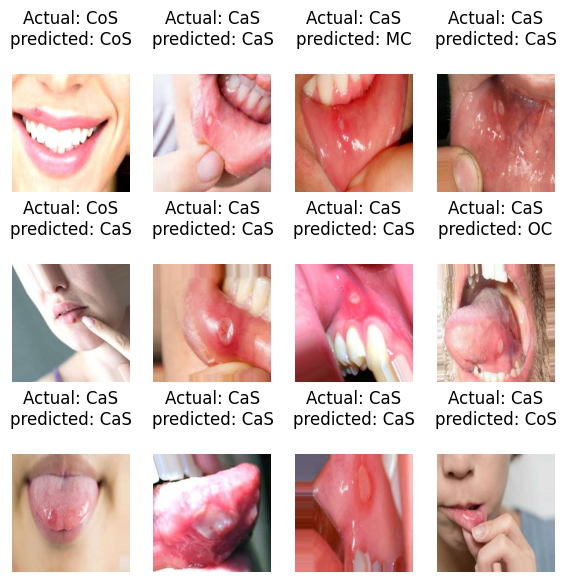

In [96]:
plt.figure(figsize=(7, 7))
for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow((x_test[i]*255).astype("uint8"))
        plt.title('Actual: ' +class_name[y_test[i]]+'\n'+'predicted: '+class_name[prediction_ner_format[i]]+'\n')
        plt.axis("off")

### model saving

In [105]:
model_version =1
import os
# Create "Models" directory if it doesn't exist
if not os.path.exists("Models"):
    os.makedirs("Models")

model_version = max([int(i.split('.')[0]) for i in os.listdir("Models") if i.split('.')[0].isdigit()] + [0]) + 1
cnn.save(f"Models/{model_version}.h5")